In [1]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o dataset
file_path = 'infoPedidos0918.csv'
dataset = pd.read_csv(file_path, encoding='cp1252', sep=';', decimal=',')


# Exibindo as primeiras linhas para entender a estrutura dos dados
dataset.head()

,,Pedido Id,Data/Hora,Situação,Situação.1,Situação - Transporte,Marketplace,Forma de Pagamento,Forma de Recebimento,Serviço Transportadora,Valor Produto,Valor Desconto,Valor Acréscimo,Valor Frete,Valor Frete Transportadora,Valor Total,Valor Total Pedido,Loja,Obs.,Origem - Pedido
0,aprovado,1451,18/09/2024 17:12,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,8.9,0.0,0,13.09,8.26,21.99,21.99,1 - Dica de Madame,1.0,Marketplace
1,aprovado,1450,18/09/2024 16:54,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,32.9,0.0,0,26.28,14.10,59.18,59.18,1 - Dica de Madame,1.0,Marketplace
2,aprovado,1449,18/09/2024 16:54,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,43.9,0.0,0,14.60,12.30,58.50,58.50,1 - Dica de Madame,NaN,Marketplace
3,aprovado,1448,18/09/2024 14:36,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,19.9,0.0,0,19.33,15.70,39.23,39.23,1 - Dica de Madame,NaN,Marketplace
4,aguardando-pagamento,1447,18/09/2024 13:46,1,1 - Aguardando Pagamento,Não Enviado,1 - Lojas Americanas,1 - Boleto Bancário,3 - B2W,14 - PAC - B2W Entregas,41.8,0.0,0,27.99,27.99,69.79,69.79,1 - Dica de Madame,NaN,Marketplace


In [ ]:
dataset.info()

In [5]:
display(dataset['Situação'].value_counts())

# 8 - Entregue
# 7 - Transporte
# 4 - Aprovado
# 1 - Aguardando pagamento
# 6 - Nota Fiscal Emitida
# 2 - Cancelado
# 26 - Nota Fiscal Cancelada
# 14 - Cancelado Pagamento

Situação
8     406
7     182
2     155
1       8
4       7
6       6
26      2
14      2
Name: count, dtype: int64

In [6]:
dataset['Situação'] = dataset['Situação'].replace(to_replace = 8, value = 'Concluida')
dataset['Situação'] = dataset['Situação'].replace(to_replace = 7, value = 'Concluida')
dataset['Situação'] = dataset['Situação'].replace(to_replace = 4, value = 'Concluida')
dataset['Situação'] = dataset['Situação'].replace(to_replace = 6, value = 'Concluida')

dataset['Situação'] = dataset['Situação'].replace(to_replace = 2, value = 'Cancelado')
dataset['Situação'] = dataset['Situação'].replace(to_replace = 26, value = 'Cancelado')
dataset['Situação'] = dataset['Situação'].replace(to_replace = 14, value = 'Cancelado')

dataset['Situação'] = dataset['Situação'].replace(to_replace = 14, value = 'Aguardando Pagamento')

In [7]:
dataset['Data/Hora'] = pd.to_datetime(dataset['Data/Hora'], format='%d/%m/%Y %H:%M')

In [15]:
# Removendo outliers usando o IQR
Q1 = dataset['Valor Total'].quantile(0.25)
Q3 = dataset['Valor Total'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando outliers
dataset = dataset[~((dataset['Valor Total'] < (Q1 - 1.5 * IQR)) | (dataset['Valor Total'] > (Q3 + 1.5 * IQR)))]

In [10]:
# Substituir vírgulas por pontos e converter para float
dataset['Valor Total'] = dataset['Valor Total'].replace(',', '.').astype(float)
dataset['Valor Frete'] = dataset['Valor Frete'].replace(',', '.').astype(float)
# Normalizando o valor total
scaler = MinMaxScaler()
dataset['Valor Total Normalizado'] = scaler.fit_transform(dataset[['Valor Total']])

In [12]:
print(dataset['Marketplace'].value_counts())
print(dataset['Situação'].value_counts())

Marketplace
41 - Shopee             311
26 - Amazon             228
7 - Mercado Livre        20
67 - AliExpress           9
23 - Magazine Luiza       6
1 - Lojas Americanas      5
Name: count, dtype: int64
Situação
Concluida    601
Cancelado    159
1              8
Name: count, dtype: int64


-------------------------------------- Visualizacao ------------------------------------------

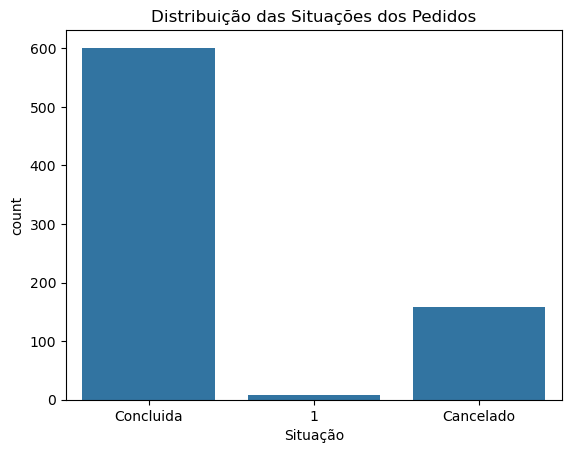

In [11]:
sns.countplot(data=dataset, x='Situação')
plt.title('Distribuição das Situações dos Pedidos')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '41 - Shopee'),
  Text(1, 0, '26 - Amazon'),
  Text(2, 0, '67 - AliExpress'),
  Text(3, 0, '7 - Mercado Livre'),
  Text(4, 0, '1 - Lojas Americanas'),
  Text(5, 0, '23 - Magazine Luiza')])

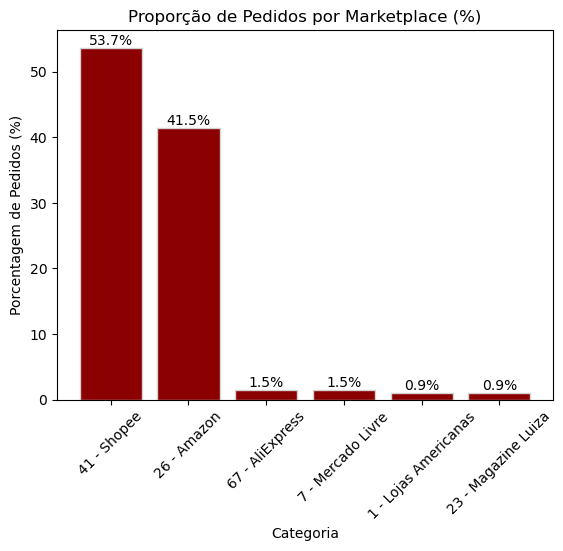

In [25]:
# Construindo a porcentagem que vai ficar em cima de cada barra
counts = dataset['Marketplace'].value_counts()
porcentagem = (counts / counts.sum()) * 100

# Definir as cores
bar_color = '#8B0000'  # Vermelho bordo fraco
edge_color = '#D3D3D3'  # Cinza clarinho

# Criar o gráfico de barras
plt.bar(porcentagem.index, porcentagem.values, color=bar_color, edgecolor=edge_color)

# Adicionar título e rótulos
plt.title('Proporção de Pedidos por Marketplace (%)')
plt.xlabel('Categoria')
plt.ylabel('Porcentagem de Pedidos (%)')

# Exibir os valores percentuais acima das barras
for i, v in enumerate(porcentagem.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

# Rotacionar os rótulos do eixo x se necessário
plt.xticks(rotation=45)


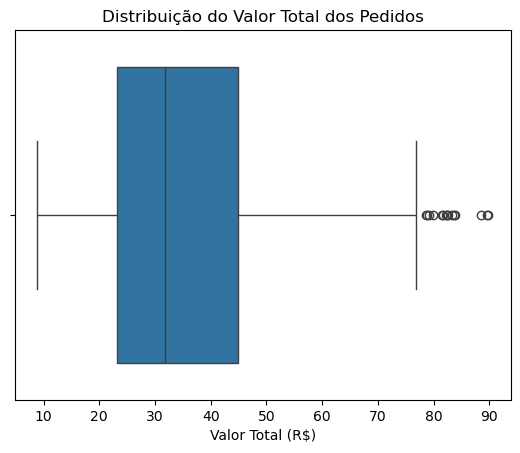

In [16]:
sns.boxplot(data=dataset, x='Valor Total')
plt.title('Distribuição do Valor Total dos Pedidos')
plt.xlabel('Valor Total (R$)')
plt.show()

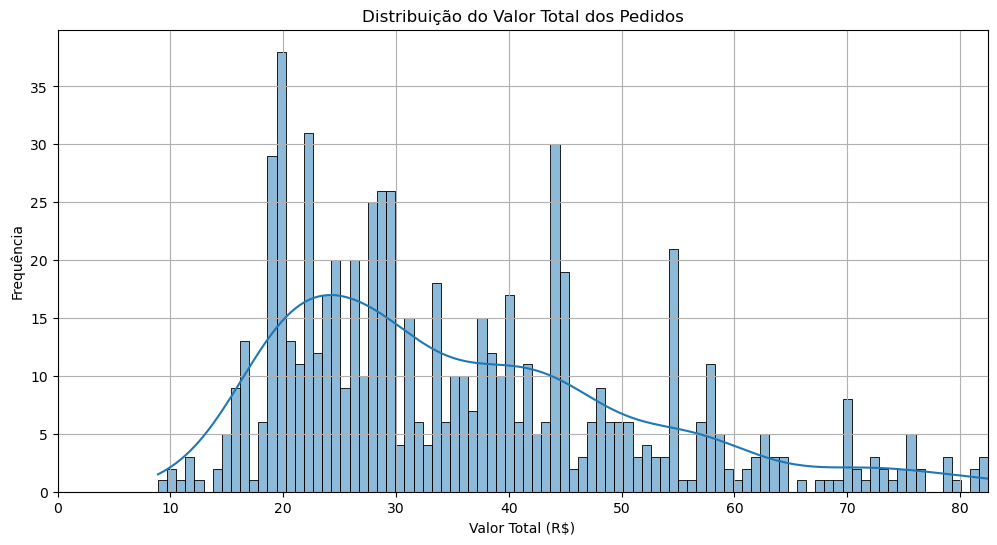

In [24]:
# Criando gráfico de distribuição do 'Valor Total' dos pedidos
plt.figure(figsize=(12, 6))  # Ajustar o tamanho da figura

# Ajustar os limites do eixo X pelo bins conforme necessário
sns.histplot(dataset['Valor Total'], kde=True, bins=100)  # Aumentar o número de bins

# Adicionar título e rótulos
plt.title('Distribuição do Valor Total dos Pedidos')
plt.xlabel('Valor Total (R$)')
plt.ylabel('Frequência')

# Ajustar os limites do eixo X para focar em valores mais comuns (opcional)
plt.xlim(0, dataset['Valor Total'].quantile(0.99))  # Focar nos 99% inferiores
plt.grid()
plt.show()